Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importar datos

In [ ]:
data = pd.read_csv('./Salary_dataset.csv')
X = data['YearsExperience'].values
Y = data['Salary'].values

Función del descenso del gradiente para regresión lineal.

In [ ]:
def mean_squared_error(y_true, y_predicted):
    return np.sum((y_true-y_predicted)**2) / len(y_true)

def gradient_descent (X, Y, iters=100, learning_rate=0.0001, stopping_threshold=1e-06):
  m = 0
  c = 0
  n = float(len(X))
  previous_cost = None
  log = []
  mse = []

  for i in range(iters):
      Y_pred = m*X + c  # El valor previsto

      # Calculando el costo
      current_cost = mean_squared_error(Y, Y_pred)

      # Sí el cambio es menor al criterio se detiene la búsqueda
      if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
          break

      previous_cost = current_cost

      D_m = (-2/n) * X.dot(Y - Y_pred).sum()  # Derivative wrt m
      D_c = (-2/n) * Y_pred.sum()  # Derivative wrt c
      m = m - learning_rate * D_m  # Update m
      c = c - learning_rate * D_c  # Update c
      mse.append(current_cost)
      log.append((m, c))

  return m, c, log, mse

Generación de gráfica

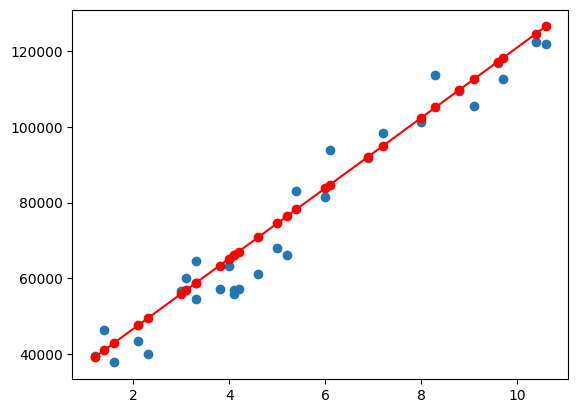

9291.493207090758 28033.77130449011


In [ ]:
m, c, log, mse = gradient_descent(X, Y, learning_rate=0.002)
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', marker='o', linestyle='-')  # regression line
plt.show()
print(m, c)